<a href="https://colab.research.google.com/github/ishaan10dutta/Collaborative-Filtering_Movie-Recommendation-System-using-Python/blob/main/Collaborative_filtering_movie_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is Collaborative Filtering?

Collaborative filtering is a family of algorithms where there are multiple ways to find similar users or items and multiple ways to calculate rating based on ratings of similar users. 

Most websites like Amazon, YouTube, and Netflix use collaborative filtering as a part of their sophisticated recommendation systems. This technique is used to build recommenders that give suggestions to a user on the basis of the likes and dislikes of similar users.



## The Dataset

The data contains a set of movies and a set of users who have reacted to some of them.

The reaction can be explicit (rating on a scale of 1 to 5, likes or dislikes) or implicit (viewing an item, adding it to a wish list, the time spent on an article).

While working with such data, it is mostly seen in the form of a matrix consisting of the reactions given by a set of users to some items from a set of items. Each row would contain the ratings given by a user, and each column would contain the ratings received by an item. A matrix with five users and five items could look like this:

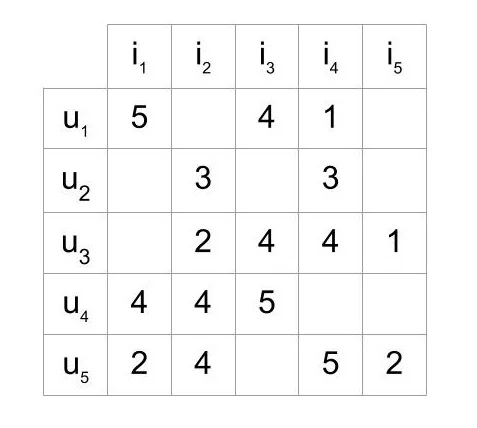

The matrix shows five users who have rated some of the items on a scale of 1 to 5. For example, the first user has given a rating 4 to the third item.

In most cases, the cells in the matrix are empty, as users only rate a few items. It’s highly unlikely for every user to rate or react to every item available.

As for the dataset I have used:

* Movie_Id_Titles: the list of movies
* u.data: the list of ratings given by users


## Setting up

In [1]:
import numpy as np
import pandas as pd

### Loading the data

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [3]:
df.head(5)

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
#reading the movie titles
movie_titles = pd.read_csv('Movie_Id_Titles')

In [5]:
movie_titles.head(5)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
#merging the titles and rating details to get final dataset
df = pd.merge(df, movie_titles, on='item_id')

In [7]:
df.head(5)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


## Exploratory Data Analysis

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
plt.style.use('ggplot')
%matplotlib inline

In [11]:
#indexing the dataset on titles and 
#sorting them in descending order on the rating's mean value 
#printing first 10 rows by head 
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: rating, dtype: float64

In [12]:
#indexing the dataset on titles and 
#sorting them in descending order on the  rating's count 
#printing the first 10 rows by head 
df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

### Ratings DataFrame

In [14]:
#creating a dataframe on index name as title 
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [15]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


### Setting up the ratings column

In [16]:
#including the count of ratings in data frams 
ratings['rating_numbers'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [17]:
ratings.head(5)

,rating,rating_numbers
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


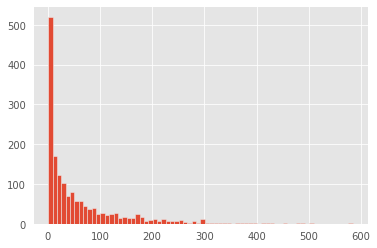

In [19]:
#histogram plot of number of ratings
ratings['rating_numbers'].hist(bins=70)
plt.show()

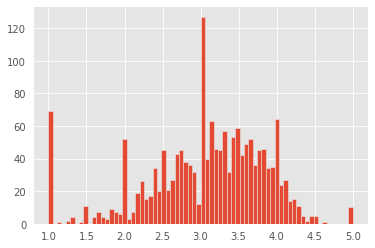

In [21]:
#histogram plot of average rating per movie
ratings['rating'].hist(bins=70)
plt.show()

## Relationship between Average Rating and Real Rating

It is obviously more likely that with a larger number of ratings will, a movie will have have more ratings

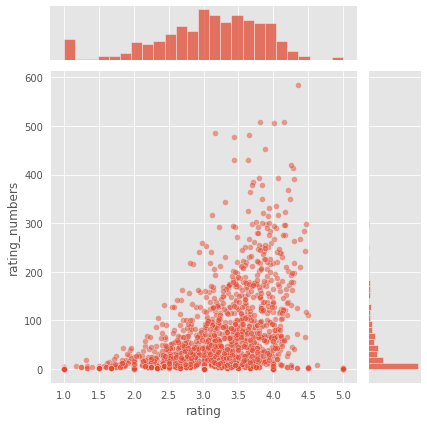

In [23]:
sns.jointplot(x='rating', y='rating_numbers', data=ratings, alpha=0.5)
plt.show()

# Recommending similar movies

I will be creating a matrix that has the user ids on one axis and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. The NaN values are due to most people not having seen most of the movies.

In [24]:
#creating a matrix of two rows describing user_id and movie titles 
moviemat = df.pivot_table(index='user_id', columns='title', values='rating')
# the rows describe the user and its rating 
# for that particular movie beneath that 
# a lot of values are filled with NaN which means that the 
# user with that user_id has not rated the movie 

# prints the first 5 rows rating data 
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),8 Heads in a Duffel Bag (1997),8 Seconds (1994),A Chef in Love (1996),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)",Afterglow (1997),"Age of Innocence, The (1993)",Aiqing wansui (1994),Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),...,"Whole Wide World, The (1996)",Widows' Peak (1994),"Wife, The (1995)",Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Reeds (1994),Wild Things (1998),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Window to Paris (1994),Wings of Courage (1995),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Winter Guest, The (1997)",Wishmaster (1997),With Honors (1994),Withnail and I (1987),Witness (1985),"Wizard of Oz, The (1939)",Wolf (1994),"Woman in Question, The (1950)","Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wooden Man's Bride, The (Wu Kui) (1994)","World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Most rated movies

In [25]:
#sorting the dataframes on the rating_numbers in 
#descending order and printing the first 10 rows 
ratings.sort_values('rating_numbers', ascending=False).head(10)

,rating,rating_numbers
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


## Comparing two movies

Choosing two movies for the system, Star Wars(1977) and Toy Story(1995.

I will try to calculate the user ratings for those two movies.

In [26]:
#finding user ratings from the matrix for Star Wars
star_wars_user_ratings = moviemat['Star Wars (1977)']

#finding user ratings from the matrix for Toy Story
toystory_user_ratings = moviemat['Toy Story (1995)']

In [27]:
star_wars_user_ratings.head(5)

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

## Finding the correlations

Finding the correlation of every other movie to that specific user behaviour on the movie "Star Wars (1977)" and "Toy Story (1995)"

I have used corrwith method of pandas to find the movies with similar user ratings as that of Star Wars.

In [29]:
#finding every other movie which is similar to star wars 
similar_to_starwars = moviemat.corrwith(star_wars_user_ratings)

similar_to_starwars.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [31]:
#finding the correlation of every other movie 
#based on the specific user behaviour on the toy story movie

similar_to_toystory = moviemat.corrwith(toystory_user_ratings)

similar_to_toystory.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)    0.534522
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.232118
12 Angry Men (1957)          0.334943
187 (1997)                   0.651857
dtype: float64

## Refining the correlated data
I will remove the NaN values and use a DF instead of Series


In [33]:
#creating a dataframe of similar movies with one coloumn 
#as correlation and dropping all the NaN values  
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])

# use dropna to drop all the NaN values 
corr_starwars.dropna(inplace=True)

In [35]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


# Finding the perfectly correlated movies

Probably, these movies happen to have been seen only by one person who also happened to rate "Star Wars(1977)" 5 stars.

In [36]:
#sorting the dataframe by correlation column 
#assuming all the movies which are rated 
#similarly to star wars will appear at first 
corr_starwars.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


# Setting rating thresholds
I will set a threshold for the number of ratings necessary and filter out movies that have less than a certain number of reviews.

Finally, I will join the 'number of ratings' column to the dataframe.


In [37]:
#using the rating number columns from ratings dataframe 
#and joining it with corr_starwars so that we can decide in future
#on number of ratings as well 
corr_starwars = corr_starwars.join(ratings['rating_numbers'], how='left', lsuffix='_left', rsuffix='_right')

#print the new data-frame after 
#joining number of ratings to it 
corr_starwars.head()

,Correlation,rating_numbers
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


Based on the histogram plot of ratings and total ratings, I decided to filter out movies that have less than 100 reviews.

In [38]:
#only printing the movies which have been rated by more than 100 people and 
# have a correlation similar to that of star wars  
corr_starwars[corr_starwars['rating_numbers']>100].sort_values('Correlation', ascending=False).head(100)

,Correlation,rating_numbers
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
Bram Stoker's Dracula (1992),0.188369,120
Young Guns (1988),0.186377,101
"Magnificent Seven, The (1954)",0.185102,121


Similarly, now the perfectly correlated movies with Toy Story are calculated.

In [39]:
#creating a dataframe of similar movies with one column 
#as correlation and dropping all the NaN values  
corr_toystory = pd.DataFrame(similar_to_toystory, columns=['Correlation'])

corr_toystory.head()

,Correlation
title,
'Til There Was You (1997),0.534522
1-900 (1994),NaN
101 Dalmatians (1996),0.232118
12 Angry Men (1957),0.334943
187 (1997),0.651857


In [40]:
#removing the NaN values and using a DF instead of Series
corr_toystory.dropna(inplace=True)

In [41]:
#using the rating number coloumns from ratings dataframe
#and joining it in corr_toystory so that we can decide in future
# on number of ratings as well 
corr_toystory = corr_toystory.join(ratings['rating_numbers'], how='left')
 
corr_toystory.head()

,Correlation,rating_numbers
title,,
'Til There Was You (1997),0.534522,9
101 Dalmatians (1996),0.232118,109
12 Angry Men (1957),0.334943,125
187 (1997),0.651857,41
2 Days in the Valley (1996),0.162728,93


In [42]:
#filtering out movies that have less than 100 reviews
corr_toystory[corr_toystory['rating_numbers']>100].sort_values('Correlation', ascending=False).head(100)

,Correlation,rating_numbers
title,,
Toy Story (1995),1.000000,452
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175
...,...,...
Father of the Bride Part II (1995),0.248401,128
Babe (1995),0.247367,219
Kingpin (1996),0.245270,162


# Conclusion
